# Spring Contact Model of hairy pad

Force during detachment of Nth hair:

$F = Nf_{max} - \frac{N(N-1)}{2}k_hw\sin{\theta}$  

Non-dimensional form:  

$\hat{F} = N\hat{f}_{max} - \frac{N(N-1)}{2}\sin{\theta}$

where.

$\hat{F} = \frac{F}{k_hw}, \hat{f}_{max} = \frac{f_{max}}{k_hw}$

Condition for propogation of detachment:

$N < \frac{\hat{f}_{max}}{\sin{\theta}} - \frac{k_b}{k_h} + 1$

Alternatively:

$sin{\theta} < \frac{\hat{f}_{max}}{(N-1) + \frac{k_b}{k_h}}$

Maximum adhesion force at fixed $\theta$:

$\hat{F}_{adh} = \frac{\hat{f}_{max}}{2}[\frac{\hat{f}_{max}}{\sin{\theta}}+1]+\frac{\sin{\theta}}{8}$

where, N at maxima is:

$N_{adh} = \frac{\hat{f}_{max}}{\sin{\theta}} + \frac{1}{2}$


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# Figure 2: Detachment mehanism

In [142]:
f_max_list = [1] #non-dimensional f_max/(k_h*w)
angle_list = [2, 4, 6, 8] #degrees
k_ratio_list = [10] #k_b/k_h
N_max = 25
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
N = np.linspace(2, N_max, 40)
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for angle in angle_list:             
            if angle != 0:
                F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
                N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
                N_zero_id = np.where(N<N_c)[0]
                F_net_soft = np.array([F_net_stiff[i] if i not in N_zero_id else 0 for i in range(len(F_net_stiff))])
            else:
                N_c = N_max
                F_net_stiff = len(N) * [(N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))]
                F_net_soft = F_net_stiff
            df_temp = pd.DataFrame({'N': N, 'Stiff': F_net_stiff, 'Soft': F_net_soft})
            df_temp = pd.melt(df_temp, id_vars=['N'], value_vars=['Stiff', 'Soft'],
                             var_name='Backing', value_name='Force')
            df_temp['angle'] = f'{angle}°'
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
            df_temp['N_c'] = N_c
            
            df = df.append(df_temp)

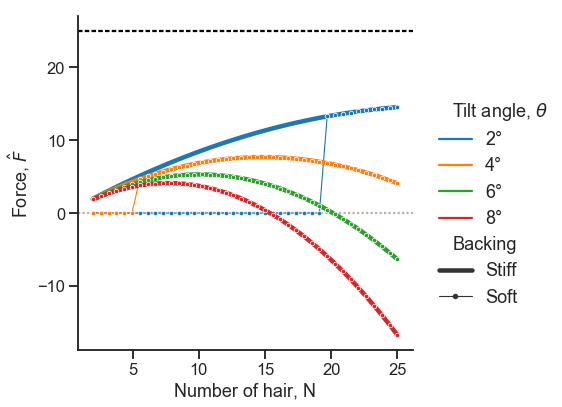

In [145]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(angle_list)]
g = sns.relplot(data=df, x = 'N', y = 'Force', hue = 'angle', style = 'Backing',
                size = 'Backing',  markers = [',', '.'], dashes = False,
                kind = 'line', palette = pal)
#symmetric log scale in y axis
# for ax1 in g.axes:
#     for ax2 in ax1:
# #         ax2.set_xscale('log')
#         ax2.set_yscale('symlog')
#         ax2.minorticks_off()
#         ticks_pos = np.logspace(0,2,2)
#         ticks = list(-ticks_pos) + list(ticks_pos)
#         ax2.set_yticks(ticks, minor = False)
g.map(plt.axhline, y=N_max*f_max, color='k', dashes=(2, 1), zorder=0)

g.map(plt.axhline, y=0, color=".7", dashes=(1, 1), zorder=0)

latex_map = {'angle': r'Tilt angle, $\theta$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])
        
g.set_axis_labels('Number of hair, N', r'Force, $\hat{F}$')
g.fig.set_size_inches(8, 6)

g.tight_layout(w_pad=0)
plt.show()

# Figure 3: Effect of tilt angle

In [126]:
f_max_list = [0.1, 1, 2, 4] #non-dimensional f_max/(k_h*w)
angle_list = np.linspace(0,10, 40) #degrees
k_ratio_list = [10] #k_b/k_h
N_max_list = [25, 50]
# N = np.linspace(2, N_max, N_max-1)
df = pd.DataFrame()
for N_max in N_max_list:
    for k_ratio in k_ratio_list:
        for f_max in f_max_list:
            for angle in angle_list: 
    #             F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
                angle_c = np.arcsin(f_max/(N_max-1+k_ratio))*180/np.pi
                if angle != 0:
                    N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
                    N_net_max = (f_max/np.sin(angle*np.pi/180)) + 0.5 #N at F_net maxima
                    if N_net_max <= N_max: #maxima should lie within N_max
                        F_max_stiff = ((f_max/2)*((f_max/np.sin(angle*np.pi/180))+1)) + (np.sin(angle*np.pi/180)/8)
                    else:
                        F_max_stiff = (N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))
                    if angle >= angle_c:
                        F_max_soft = F_max_stiff
                    else:
                        F_max_soft = (N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))
    #                 N_zero_id = np.where(N<N_c)[0]
    #                 F_net_soft = np.array([F_net_stiff[i] \
    #                                        if i not in N_zero_id else 0 \
    #                                        for i in range(len(F_net_stiff))])
                else:
                    N_c = N_max
                    F_max_stiff = N_max*f_max
                    F_max_soft = N_max*f_max

                df_temp = pd.DataFrame({'Backing': ['Stiff', 'Soft'], 
                                        'Force': [F_max_stiff, F_max_soft]})
                df_temp['angle'] = angle
                df_temp['f_max'] = f_max
                df_temp['k_ratio'] = k_ratio
                df_temp['N_c'] = N_c
                df_temp['angle_c'] = angle_c
                df_temp['N'] = N_max
    #             df_temp['Force'] = df_temp['Force']/N_max 

                df = df.append(df_temp)

df = df[df['Backing'] == 'Stiff']
# group_cols = list(df.columns.drop('N').drop('Force'))
# df_max = df.groupby(group_cols).max().reset_index()

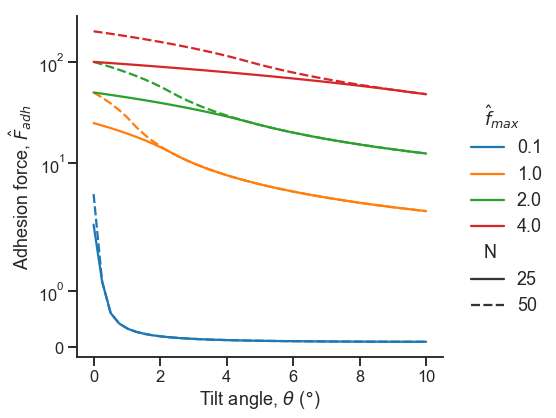

In [127]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(f_max_list)] #hue parameter
g = sns.relplot(data=df, x = 'angle', y = 'Force', hue = 'f_max', style = 'N',
                kind = 'line', 
                palette = pal)
#symmetric log scale in y axis
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_yscale('symlog')
#     for line in ax2.lines:
#         line.set_markersize(1)
#         line.set_markeredgecolor(line.get_markerfacecolor())
        
latex_map = {'f_max': r'$\hat{f}_{max}$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])

g.set_axis_labels(r'Tilt angle, $\theta$ ($\degree$)', r'Adhesion force, $\hat{F}_{adh}$')

g.fig.set_size_inches(8, 6)
# g.tight_layout(w_pad=0)
plt.show()

# Figure 4: Critical tilt angle

In [136]:
f_max_list = [0.1, 1, 2, 4] #non-dimensional f_max/(k_h*w)
angle_list = np.linspace(0,30, 1) #degrees
k_ratio_list = np.logspace(-1,3, 100) #k_b/k_h
N_max_list = [25, 50]
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for N_max in N_max_list:
            #critical angle for propogation
            sin_c = f_max/(N_max-1+k_ratio)
            if sin_c <= 1 and sin_c >= -1:
                angle_c = np.arcsin(sin_c)*180/np.pi
            else:
                angle_c = 90
            df_temp = pd.DataFrame({'angle_c': [angle_c],
                                   'f_max': [f_max],
                                   'k_ratio': [k_ratio],
                                   'N': [N_max]})
            df = df.append(df_temp)

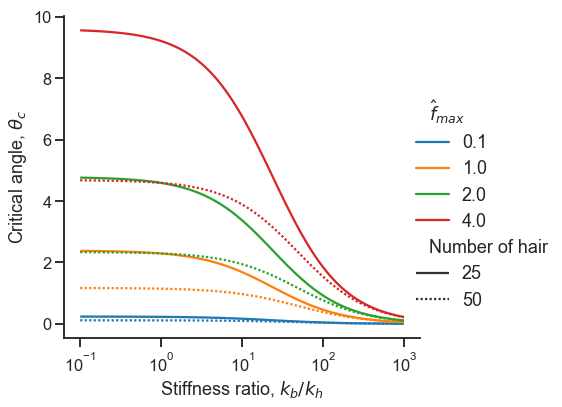

In [137]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(f_max_list)] #hue parameter
g = sns.relplot(data = df, x = 'k_ratio', y = 'angle_c', hue = 'f_max',
                style = 'N', kind = 'line', marker = None, palette = pal,
                dashes = [(1, 0), (1, 1)])
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_xscale('log')
        ax2.minorticks_off()

latex_map = {'f_max': r'$\hat{f}_{max}$',
            'N': 'Number of hair'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])

g.set_axis_labels('Stiffness ratio, $k_b/k_h$', r'Critical angle, $\theta_c$')

g.fig.set_size_inches(8, 6)
g.tight_layout(w_pad=0)
plt.show()

In [32]:
g._legend.texts

[Text(0, 0, 'Tilt angle, $\\theta$'),
 Text(0, 0, '0°'),
 Text(0, 0, '2°'),
 Text(0, 0, '4°'),
 Text(0, 0, '8°'),
 Text(0, 0, '16°'),
 Text(0, 0, 'Backing'),
 Text(0, 0, 'Stiff'),
 Text(0, 0, 'Soft')]